
# FEM Hand-calculation Heat Transfer Example

Consider isotropic and homogeneous heat diffusion in a square: 
$$\nabla \cdot( k \nabla T) + f =0$$
where $k=0.1\, W/(m^\circ C)$, $L = 1\,m$, $f=10\,W/m^3$, $T_0=0\,^\circ$. 
1. Formulate the weak form of the problem
2. Solve the problem by a finite element method with 4 triangular element of linear basis functions and plot the temperature distribution given by FEM. 
3. Solve the problem by a FEM with 4 quadrilateral element of bilinear shape functions and plot the temperature distribution given by FEM.
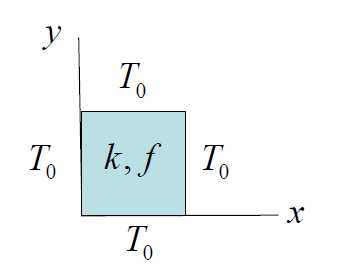

# Solution
## 1. Weak form
Multiply the original equation with weight function $w$ and integration, 
\begin{align}
\int_{\Omega} \nabla \cdot( k \nabla T)wdA + \int_{\Omega} fwdA&=0\\
\int_{\Omega} \nabla\cdot(k\nabla T w)dA- \int_{\Omega} k\nabla T\cdot \nabla w dA + \int_{\Omega} fwdA &=0 \\
\int_{\partial\Omega} k\nabla T \cdot w\vec{n} dS - \int_{\Omega} k\nabla T\cdot \nabla w dA + \int_{\Omega} fwdA &=0 
\end{align}
where integration by parts and gauss divergence theorem are used. 
The first term is zero because $w=0$ on the essential boundaries when $T=T_0=0$ on the edges. 

So the final weak form is $$-\int_{\Omega} k\nabla T\cdot \nabla w dA + \int_{\Omega} fwdA =0 $$

## 2. Mesh
we would like to shift the coordiinate system and take advantage of the symmetry, and distretize the whole domain into 4 triangles.  
<div>
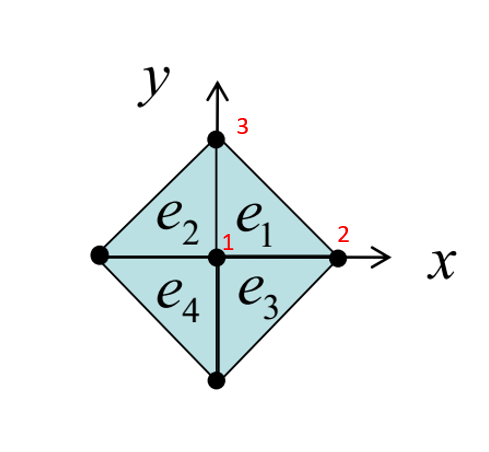
</div>


the 3 nodes for element $e_1$ is $(x_1,y_1)=(0,0)$, $(x_2,y_2)=(\dfrac{\sqrt{2}L}{2},0), (x_3,y_3)=(0,\dfrac{\sqrt{2}L}{2})$

## 3. shape functions
Construct 3 (equal to the number of nodes) shape functions $N_i(x,y)=a_i+b_ix+c_iy$ such that $N_i(x_j,y_j)=\delta_{ij}, i,j = 1,2,3$ 
so we can get \begin{align}
N_1 &= 1-\dfrac{\sqrt{2}}{L}x-\dfrac{\sqrt{2}}{L}y\\
N_2 & = \dfrac{\sqrt{2}}{L}x\\
N_3 & = \dfrac{\sqrt{2}}{L}y
\end{align}

## 4. discretized weak form
Select the trial function $T_h(x,y)$ and weight function $w(x,y)$ as 
$$T_h(x,y)=\sum_1^3 d_i N_i(x,y),\quad\quad w(x,y)=\sum_1^3c_i N_i(x,y)$$
As this is handcalculation, we can apply boundary conditions here we get $d_2=d_3=0$, so there is only one unknown $d_1$

substitue into the weak form, we can get a linear system
\begin{align}
-\int_{\Omega} k\nabla T\cdot \nabla w dA + \int_{\Omega} fwdA &=0 \\
-\int_{e_1}k(\dfrac{\partial (d_1N_1)}{\partial x}\dfrac{\partial N_1}{\partial x}+\dfrac{\partial (d_1N_1)}{\partial y}\dfrac{\partial N_1}{\partial y})dA+\int_{e_1} fN_1dA&=0\\
-d_1\underbrace{\int_{e_1}k((-\dfrac{\sqrt{2}}{L})(-\dfrac{\sqrt{2}}{L})+(-\dfrac{\sqrt{2}}{L})(-\dfrac{\sqrt{2}}{L}))dA}_{k_{11}}+\underbrace{\int_{e_1} f(1-\dfrac{\sqrt{2}}{L}x-\dfrac{\sqrt{2}}{L}y)dA}_{f_1}&=0\\
-d_1k\dfrac{4}{L^2}\int_{e_1}dA+f\int_{0}^{\frac{\sqrt{2}L}{2}}dy\int_{0}^{\frac{\sqrt{2}L}{2}-y} (1-\dfrac{\sqrt{2}}{L}x-\dfrac{\sqrt{2}}{L}y)dx&=0
\end{align}

evaluate the integral for $k_{11} = k$, $f_1=\dfrac{fL^2}{12}$

so we get the temperature at the center as $d_1 =\dfrac{fL^2}{12k}$






## 5 questions
1. why only $N_1$ is shown for weight function $w$?  What about constants $c$?

Because $w=\sum c_iN_i = c_1N_1 + c_2N_2 + c_3N_3$, plug in the requirement of $w=0$ on essential boundary conditions $\Gamma_u$, we have $c_2 = c_3 = 0$. Eventually $c_1$ will be canceled from both hand sides if you plugin them into the weak form

2. why the internal boundary of $e_1$ is not included in the weak form?

Yes, $w$ is not zero on the internal boundary of $e_1$, however, due to symmetry, $\dfrac{\partial T}{\partial x}=0$ on the vertical internal boundary, and $\dfrac{\partial T}{\partial y}=0$ on the horizontal internal boundary, the flux term $\nabla T \cdot w\vec{n} =0$
So we still don't need to worry about that. 

3. what is the temperature in the interior areas? 

Once we found $d_1$, the approximated temperature distribution in the $e_1$ domain is $$T_h(x,y)=\dfrac{fL^2}{12k}(1-\dfrac{\sqrt{2}}{L}x-\dfrac{\sqrt{2}}{L}y)$$
The solution for other areas can be found through symmetry.

In [1]:
import sympy as sp # use symbolic python taking derivative
#import numpy as np
x, y, L = sp.symbols('x y L') # define it as symbols
sp.init_printing(use_unicode=True)

In [3]:
 sp.integrate(1-sp.sqrt(2)/L*x-sp.sqrt(2)/L*y,(x,0,sp.sqrt(2)/2*L-y),(y,0,sp.sqrt(2)/2*L))

# Solving the problem using 4 quadrilateral elements
<div>
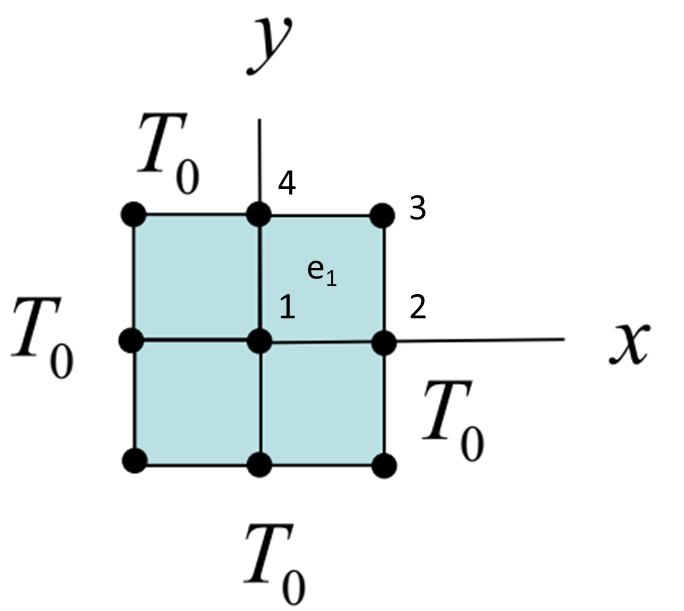
</div>

## 1 weak form 

this is the same as the above for triangle element
$$-\int_{\Omega} k\nabla T\cdot \nabla w dA + \int_{\Omega} fwdA =0 $$

## 2 mesh

We discretize it into 4 quadrilateral element, as shown above. Due to symmetry, we only need to solve the problem on element $e_1$ with boundary conditions $T=T_0=0$ on edge $\Gamma_{2-3-4}$, and $\dfrac{\partial T}{\partial n}=0$ on edge $\Gamma_{4-1-2}$.

The node coordinates are $(x_1,y_1)=(0,0), (x_2,y_2)=(\frac{L}{2},0), (x_3,y_3)=(\frac{L}{2},\frac{L}{2}), (x_4,y_4)=(0,\frac{L}{2})$

## 3 Shape function 
Construct 4 (equal to the number of nodes) shape functions $N_i(x,y)=a_i+b_ix+c_iy+d_ixy$ such that $N_i(x_j,y_j)=\delta_{ij}, i,j = 1,2,3,4$ 
so we can get \begin{align}
N_1 &= (1-\dfrac{2}{L}x)(1-\dfrac{2}{L}y)\\
N_2 & = \dfrac{2}{L}x(1-\dfrac{2}{L}y)\\
N_3 & = \dfrac{2}{L}x\dfrac{2}{L}y\\
N_4 & = (1-\dfrac{2}{L}x)(\dfrac{2}{L}y)
\end{align}
**Trick** There is nothing wrong to solve those 4 unknowns but takes more time. Here I construct the shape function at each node by $N_i=\phi_{ix}\phi_{jy}$ where $\phi_{ix}, \phi_{jy}, i,j = 1,2$ are the shape functions for 1D element in $x,y$ directions, e.g., 
\begin{align}
\phi_{1x}&=1-\frac{2}{L}x,\quad \phi_{2x}=\frac{2}{L}x\\
\phi_{1y}&=1-\frac{2}{L}y,\quad \phi_{2y}=\frac{2}{L}y
\end{align}


## 4. discretized weak form
Select the trial function $T_h(x,y)$ and weight function $w(x,y)$ as 
$$T_h(x,y)=\sum_1^4 d_i N_i(x,y),\quad\quad w(x,y)=\sum_1^4c_i N_i(x,y)$$
As this is handcalculation, we can apply boundary conditions here we get $d_2=d_3=d_4=0$, so there is only one unknown $d_1$. Similarly for $w(x,y)=c_1N_1$. (why $c_2=c_3=c_4=0$? Essential boundary conditions)

substitue into the weak form, we can get a linear system
\begin{align}
-\int_{\Omega} k\nabla T\cdot \nabla w dA + \int_{\Omega} fwdA &=0 \\
-\int_{e_1}k(\dfrac{\partial (d_1N_1)}{\partial x}\dfrac{\partial N_1}{\partial x}+\dfrac{\partial (d_1N_1)}{\partial y}\dfrac{\partial N_1}{\partial y})dA+\int_{e_1} fN_1dA&=0\\
-d_1\underbrace{\int_{e_1}k(\left[(1-\dfrac{2}{L}y)(-\dfrac{2}{L})\right]^2+\left[(1-\dfrac{2}{L}x)(-\dfrac{2}{L})\right]^2)dA}_{k_{11}}+\underbrace{\int_{e_1} f(1-\dfrac{2}{L}x)(1-\dfrac{2}{L}y)dA}_{f_1}&=0\\
-d_1k\int_{0}^{\frac{L}{2}}dy\int_0^{\frac{L}{2}}(\left[(1-\dfrac{2}{L}y)(-\dfrac{2}{L})\right]^2+\left[(1-\dfrac{2}{L}x)(-\dfrac{2}{L})\right]^2)dx+f\int_{0}^{\frac{L}{2}}dy\int_{0}^{\frac{L}{2}} (1-\dfrac{2}{L}x)(1-\dfrac{2}{L}y)dx&=0
\end{align}

evaluate the integral for $k_{11} =\dfrac{2}{3}k$, $f_1=\dfrac{fL^2}{16}$

so we get the temperature at the center as $d_1 =\dfrac{f_1}{k_{11}}=\dfrac{3fL^2}{32k}$

In [5]:
 # k11 without k
sp.integrate(((1-2/L*y)*(-2/L))**2+((1-2/L*x)*(-2/L))**2,(x,0,L/2),(y,0,L/2))

In [6]:
# f1 without f
sp.integrate((1-2/L*y)*(1-2/L*x),(x,0,L/2),(y,0,L/2))

# What about the error for each approximation?

## analytical solution

It is quite complicated to find the analytical solution, but here is an example of how it is done: https://math.stackexchange.com/questions/3785116/how-to-solve-poisson-equation-on-square
